In [1]:
model_ckpt = "MCG-NJU/videomae-base" # pre-trained model from which to fine-tune
batch_size = 4 # batch size for training and evaluation

In [2]:
!pip install --upgrade transformers

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 28.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.20.1
    Uninstalling transformers-4.20.1:
      Successfully uninstalled transformers-4.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.12.1 which is incompatible.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transf

In [3]:
!pip install pytorchvideo evaluate -q

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
#!pip install ipywidgets

In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [5]:
from huggingface_hub import hf_hub_download


hf_dataset_identifier = "minoosh/IEMOCAP_videos"
filename = "IEMOCAP_videos"
file_path = hf_hub_download(
    repo_id=hf_dataset_identifier, filename=filename, repo_type="dataset"
)

In [6]:
!tar xf {file_path}

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [7]:
! du -sh /content/*

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
du: cannot access '/content/*': No such file or directory


In [8]:
dataset_root_path = "IEMOCAP_videos"

!find {dataset_root_path} | head -5

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
IEMOCAP_videos
IEMOCAP_videos/Session4
IEMOCAP_videos/Session4/ang
IEMOCAP_videos/Session4/ang/Ses04F_script01_2_F007.mp4
IEMOCAP_videos/Session4/ang/Ses04F_script01_1_M034.mp4
find: ‘standard output’: Broken pipe
find: write error


In [9]:
import pathlib

dataset_root_path = pathlib.Path(dataset_root_path)

In [10]:
dataset_root_path

PosixPath('IEMOCAP_videos')

In [11]:
video_count_train = len(list(dataset_root_path.glob("Session1/*/*.mp4")))
video_count_train += len(list(dataset_root_path.glob("Session2/*/*.mp4")))
video_count_train += len(list(dataset_root_path.glob("Session3/*/*.mp4")))
video_count_val = len(list(dataset_root_path.glob("Session4/*/*.mp4")))
video_count_test = len(list(dataset_root_path.glob("Session5/*/*.mp4")))
video_total = video_count_train + video_count_val + video_count_test
print(f"Total videos: {video_total}")

Total videos: 5531


In [12]:
all_video_file_paths = (
    list(dataset_root_path.glob("Session1/*/*.mp4"))
    + list(dataset_root_path.glob("Session2/*/*.mp4"))
    + list(dataset_root_path.glob("Session3/*/*.mp4"))
    + list(dataset_root_path.glob("Session4/*/*.mp4"))
    + list(dataset_root_path.glob("Session5/*/*.mp4"))
)
all_video_file_paths[:5]

[PosixPath('IEMOCAP_videos/Session1/ang/Ses01M_script03_2_M030.mp4'),
 PosixPath('IEMOCAP_videos/Session1/ang/Ses01F_impro04_F031.mp4'),
 PosixPath('IEMOCAP_videos/Session1/ang/Ses01F_script03_2_F021.mp4'),
 PosixPath('IEMOCAP_videos/Session1/ang/Ses01F_script03_2_F039.mp4'),
 PosixPath('IEMOCAP_videos/Session1/ang/Ses01M_script03_2_F026.mp4')]

In [13]:
class_labels = sorted({str(path).split("/")[2] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")

Unique classes: ['ang', 'hap', 'neu', 'sad'].


In [14]:
from transformers import VideoMAEFeatureExtractor, VideoMAEForVideoClassification


feature_extractor = VideoMAEFeatureExtractor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,  # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

/opt/conda/lib/python3.7/site-packages/transformers/models/videomae/feature_extraction_videomae.py:31: FutureWarning: The class VideoMAEFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use VideoMAEImageProcessor instead.
  FutureWarning,


Some weights of the model checkpoint at MCG-NJU/videomae-base were not used when initializing VideoMAEForVideoClassification: ['decoder.decoder_layers.0.intermediate.dense.bias', 'decoder.decoder_layers.0.attention.attention.q_bias', 'decoder.decoder_layers.0.layernorm_before.bias', 'decoder.decoder_layers.1.layernorm_after.bias', 'decoder.decoder_layers.3.attention.attention.query.weight', 'decoder.decoder_layers.3.attention.attention.q_bias', 'decoder.decoder_layers.3.intermediate.dense.bias', 'decoder.decoder_layers.3.layernorm_after.bias', 'decoder.head.bias', 'decoder.decoder_layers.2.output.dense.weight', 'decoder.decoder_layers.2.attention.attention.query.weight', 'decoder.decoder_layers.1.attention.attention.query.weight', 'decoder.decoder_layers.2.output.dense.bias', 'decoder.decoder_layers.2.attention.attention.v_bias', 'decoder.decoder_layers.1.attention.attention.value.weight', 'decoder.norm.weight', 'decoder.decoder_layers.3.layernorm_before.bias', 'decoder.decoder_layers.

In [15]:
import pytorchvideo.data

from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
)

In [16]:
feature_extractor.size

{'shortest_edge': 224}

In [17]:
feature_extractor.size['shortest_edge']

224

In [18]:
import os

mean = feature_extractor.image_mean
std = feature_extractor.image_std
#resize_to = feature_extractor.size
resize_to = feature_extractor.size['shortest_edge']

num_frames_to_sample = model.config.num_frames
sample_rate = 4
fps = 30
clip_duration = num_frames_to_sample * sample_rate / fps

# Training dataset transformations.
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=256, max_size=320),
                    RandomCrop(resize_to),
                    RandomHorizontalFlip(p=0.5),
                ]
            ),
        ),
    ]
)
# Training dataset.
train_dataset1 = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Session1"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)
train_dataset2 = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Session2"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)
train_dataset3 = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Session3"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)

In [19]:
import torch
train_dataset = torch.utils.data.ChainDataset([train_dataset1, train_dataset2, train_dataset3])

In [20]:
# Validation and evaluation datasets' transformations.
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize((resize_to, resize_to)),
                ]
            ),
        ),
    ]
)

# Validation and evaluation datasets.
val_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Session4"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)
test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Session5"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

In [21]:
clip_duration

2.1333333333333333

In [22]:
# We can access the `num_videos` argument to know the number of videos we have in the
# dataset.
train_dataset.num_videos = sum([train_dataset1.num_videos, train_dataset2.num_videos, train_dataset3.num_videos])
train_dataset.num_videos, val_dataset.num_videos, test_dataset.num_videos

(3259, 1031, 1241)

In [23]:
sample_video = next(iter(train_dataset))
sample_video.keys()

dict_keys(['video', 'video_name', 'video_index', 'clip_index', 'aug_index', 'label'])

In [24]:
def investigate_video(sample_video):
    """Utility to investigate the keys present in a single video sample."""
    for k in sample_video:
        if k == "video":
            print(k, sample_video["video"].shape)
        else:
            print(k, sample_video[k])

    print(f"Video label: {id2label[sample_video[k]]}")


investigate_video(sample_video)

video torch.Size([3, 16, 224, 224])
video_name Ses01F_impro03_F008.mp4
video_index 235
clip_index 0
aug_index 0
label 1
Video label: hap


In [25]:
import imageio
import numpy as np
from IPython.display import Image


def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)


def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.
    
    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename


def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

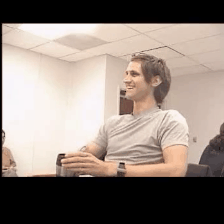

In [26]:
video_tensor = sample_video["video"]
display_gif(video_tensor)

In [27]:
video_tensor

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -

In [28]:
from transformers import TrainingArguments, Trainer

model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-IEMOCAP_videos"
num_epochs = 10

args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // batch_size) * num_epochs,
)

In [29]:
import evaluate

metric = evaluate.load("accuracy")

In [30]:
# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions."""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [31]:
import torch


def collate_fn(examples):
    """The collation function to be used by `Trainer` to prepare data batches."""
    # permute to (num_frames, num_channels, height, width)
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [32]:
train_dataset

In [33]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

Cloning https://huggingface.co/minoosh/videomae-base-finetuned-IEMOCAP_videos into local empty directory.


Download file pytorch_model.bin:   0%|          | 15.1k/329M [00:00<?, ?B/s]

Download file runs/Feb22_15-57-08_96ef41e8ec00/1677081435.58889/events.out.tfevents.1677081435.96ef41e8ec00.15…

Download file runs/Feb22_10-21-58_cd588aaa2df1/1677061330.3582237/events.out.tfevents.1677061330.cd588aaa2df1.…

Download file runs/Feb22_10-21-58_cd588aaa2df1/events.out.tfevents.1677061330.cd588aaa2df1.1013.0:  27%|##6   …

Download file runs/Feb22_15-25-48_96ef41e8ec00/events.out.tfevents.1677079688.96ef41e8ec00.23.0: 100%|########…

Download file runs/Feb22_15-25-48_96ef41e8ec00/1677079688.2543015/events.out.tfevents.1677079688.96ef41e8ec00.…

Download file runs/Feb22_15-54-37_96ef41e8ec00/1677081283.3190463/events.out.tfevents.1677081283.96ef41e8ec00.…

Download file runs/Feb22_15-57-08_96ef41e8ec00/events.out.tfevents.1677081435.96ef41e8ec00.1514.0: 100%|######…

Clean file runs/Feb22_15-57-08_96ef41e8ec00/events.out.tfevents.1677081435.96ef41e8ec00.1514.0:   6%|5        …

Clean file runs/Feb22_15-54-37_96ef41e8ec00/1677081283.3190463/events.out.tfevents.1677081283.96ef41e8ec00.23.…

Clean file runs/Feb22_15-25-48_96ef41e8ec00/events.out.tfevents.1677079688.96ef41e8ec00.23.0:  25%|##4       |…

Clean file runs/Feb22_10-21-58_cd588aaa2df1/1677061330.3582237/events.out.tfevents.1677061330.cd588aaa2df1.101…

Clean file runs/Feb22_10-21-58_cd588aaa2df1/events.out.tfevents.1677061330.cd588aaa2df1.1013.0:   3%|3        …

Clean file runs/Feb22_15-57-08_96ef41e8ec00/1677081435.58889/events.out.tfevents.1677081435.96ef41e8ec00.1514.…

Clean file runs/Feb22_15-25-48_96ef41e8ec00/1677079688.2543015/events.out.tfevents.1677079688.96ef41e8ec00.23.…

Download file runs/Feb22_15-54-37_96ef41e8ec00/events.out.tfevents.1677081283.96ef41e8ec00.23.2: 100%|########…

Download file training_args.bin: 100%|##########| 3.48k/3.48k [00:00<?, ?B/s]

Clean file training_args.bin:  29%|##8       | 1.00k/3.48k [00:00<?, ?B/s]

Clean file runs/Feb22_15-54-37_96ef41e8ec00/events.out.tfevents.1677081283.96ef41e8ec00.23.2:  25%|##4       |…

Clean file pytorch_model.bin:   0%|          | 1.00k/329M [00:00<?, ?B/s]

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
train_results = trainer.train()

***** Running training *****
  Num examples = 65120
  Num Epochs = 9223372036854775807
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 8140
  Number of trainable parameters = 86230276


Epoch,Training Loss,Validation Loss,Accuracy
0,1.384000,1.484639,0.207143
1,1.358500,1.442573,0.207143
2,1.327900,1.361914,0.329121
3,1.402400,1.391693,0.313187
4,1.317700,1.429875,0.265934
5,1.343900,1.356532,0.281868
6,1.251900,1.349019,0.315385
7,1.267300,1.350228,0.310989


***** Running Evaluation *****
  Num examples: Unknown
  Batch size = 8
Saving model checkpoint to videomae-base-finetuned-IEMOCAP_videos/checkpoint-815
Configuration saved in videomae-base-finetuned-IEMOCAP_videos/checkpoint-815/config.json
Model weights saved in videomae-base-finetuned-IEMOCAP_videos/checkpoint-815/pytorch_model.bin
Image processor saved in videomae-base-finetuned-IEMOCAP_videos/checkpoint-815/preprocessor_config.json
Image processor saved in videomae-base-finetuned-IEMOCAP_videos/preprocessor_config.json
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples: Unknown
  Batch size = 8
Saving model checkpoint to videomae-base-finetuned-IEMOCAP_videos/checkpoint-1630
Configuration saved in videomae-base-finetu

In [ ]:
trainer.evaluate(test_dataset)

In [ ]:
trainer.save_model()
test_results = trainer.evaluate(test_dataset)
trainer.log_metrics("test", test_results)
trainer.save_metrics("test", test_results)
trainer.save_state()

## push to hub

In [ ]:
trainer.push_to_hub()

## Inference

In [ ]:
trained_model = VideoMAEForVideoClassification.from_pretrained('minoosh/videomae-base-finetuned-IEMOCAP_videos')

In [ ]:
sample_test_video = next(iter(test_dataset))
investigate_video(sample_test_video)

In [ ]:
def run_inference(model, video):
    """Utility to run inference given a model and test video.
    
    The video is assumed to be preprocessed already.
    """
    # (num_frames, num_channels, height, width)
    perumuted_sample_test_video = video.permute(1, 0, 2, 3)

    inputs = {
        "pixel_values": perumuted_sample_test_video.unsqueeze(0),
        "labels": torch.tensor(
            [sample_test_video["label"]]
        ),  # this can be skipped if you don't have labels available.
    }
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model = model.to(device)

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    return logits

In [ ]:
logits = run_inference(trained_model, sample_test_video["video"])

In [ ]:
display_gif(sample_test_video["video"])

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])